In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [31]:
df1 = pd.read_csv('ex2data1-logistic - ex2data1.csv')
df2=pd.read_csv('ex2data2-logistic - ex2data2.csv')

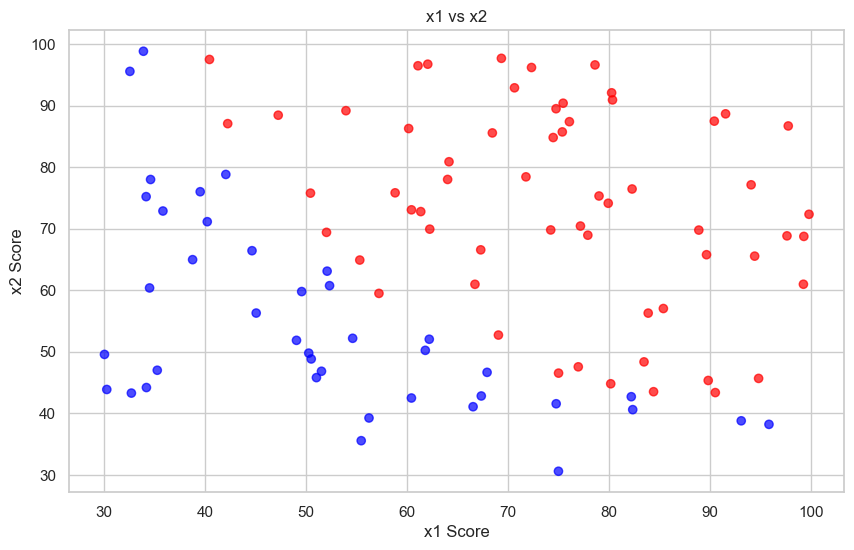

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(df1['x1'], df1['x2'], c=df1['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x1 Score')
plt.ylabel('x2 Score')
plt.title('x1 vs x2')
plt.show()

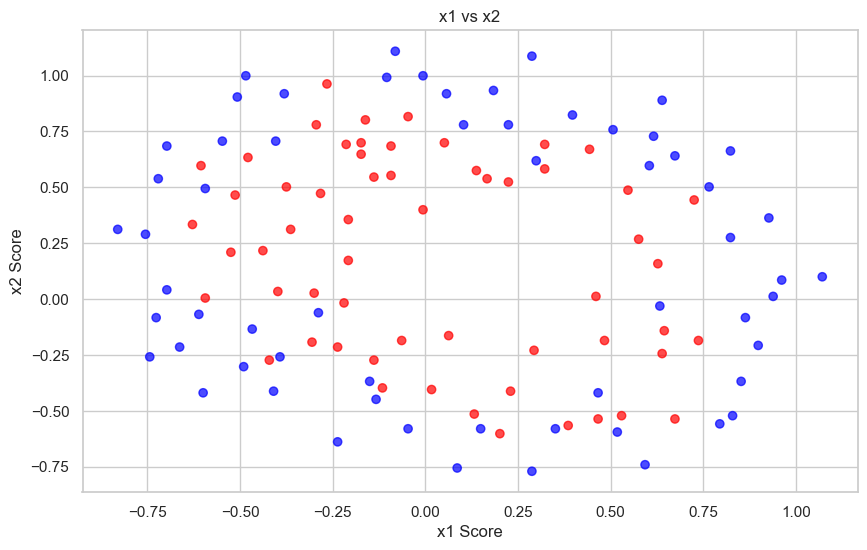

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(df2['x1'], df2['x2'], c=df2['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x1 Score')
plt.ylabel('x2 Score')
plt.title('x1 vs x2')
plt.show()

# 1. Data Preparation


In [34]:
X1 = df1[['x1', 'x2']].values
y1 = df1['y'].values.reshape(-1, 1)
X2 = df2[['x1', 'x2']].values
y2 = df2['y'].values.reshape(-1, 1)

# 2. Sigmoid Function

In [35]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# 3. Cost Function


In [36]:
def compute_cost1(X1, y1, theta):
  m = len(y1)
  h = sigmoid(X1 @ theta)
  cost = -(1/m) * (y1.T @ np.log(h) + (1-y1).T @ np.log(1-h))
  return cost[0, 0]

def compute_cost2(X2, y2, theta):
  m = len(y2)
  h = sigmoid(X2 @ theta)
  cost = -(1/m) * (y2.T @ np.log(h) + (1-y2).T @ np.log(1-h))
  return cost[0, 0]

# 4. Gradient Descent


In [37]:
def gradient_descent2(X2, y2, theta, alpha, num_iters):
  m = len(y2)
  cost_history = []
  for i in range(num_iters):
    h = sigmoid(X2 @ theta)
    gradient = (1/m) * (X2.T @ (h - y2))
    theta -= alpha * gradient
    cost_history.append(compute_cost2(X2, y2, theta))
  return theta, cost_history

def gradient_descent1(X1, y1, theta, alpha, num_iters):
  m = len(y1)
  cost_history = []
  for i in range(num_iters):
    h = sigmoid(X1 @ theta)
    gradient = (1/m) * (X1.T @ (h - y1))
    theta -= alpha * gradient
    cost_history.append(compute_cost1(X1, y1, theta))
  return theta, cost_history

# 5.Predict Accuracy

In [38]:

X1 = np.hstack((np.ones((X1.shape[0], 1)), X1))
X2 = np.hstack((np.ones((X2.shape[0], 1)), X2))
theta1 = np.zeros((X1.shape[1], 1))
theta2 = np.zeros((X2.shape[1], 1))
alpha = 0.01
num_iters = 10000
theta1, cost_history1 = gradient_descent1(X1, y1, theta1, alpha, num_iters)
theta2, cost_history2 = gradient_descent2(X2, y2, theta2, alpha, num_iters)

def predict(X, theta):
  prob = sigmoid(X @ theta)
  return (prob >= 0.5).astype(int)
predictions1 = predict(X1, theta1)
predictions2 = predict(X2, theta2)
accuracy1 = np.mean(predictions1 == y1) * 100
accuracy2 = np.mean(predictions2 == y2) * 100
print(f'Accuracy for Dataset 1: {accuracy1:.2f}%')
print(f'Accuracy for Dataset 2: {accuracy2:.2f}%')

C:\Users\HET\AppData\Local\Temp\ipykernel_9924\597785361.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * (y1.T @ np.log(h) + (1-y1).T @ np.log(1-h))
C:\Users\HET\AppData\Local\Temp\ipykernel_9924\597785361.py:4: RuntimeWarning: invalid value encountered in matmul
  cost = -(1/m) * (y1.T @ np.log(h) + (1-y1).T @ np.log(1-h))


Accuracy for Dataset 1: 60.00%
Accuracy for Dataset 2: 55.08%


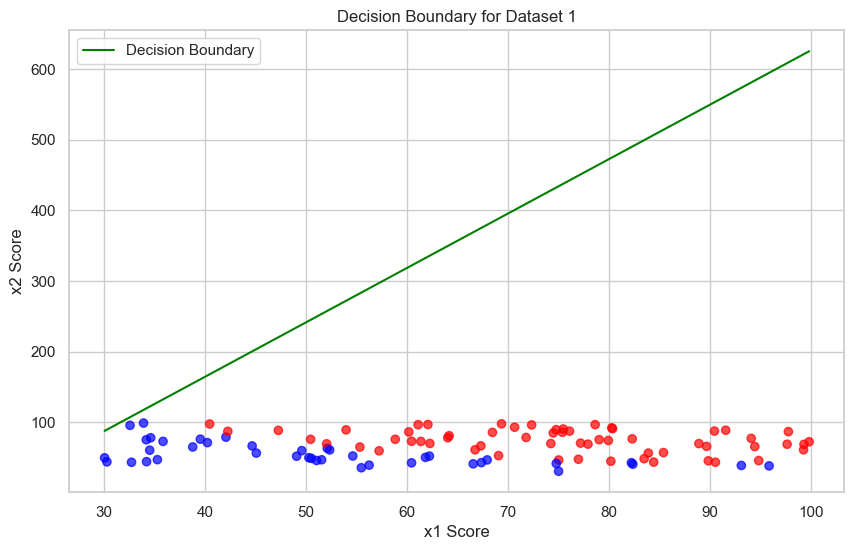

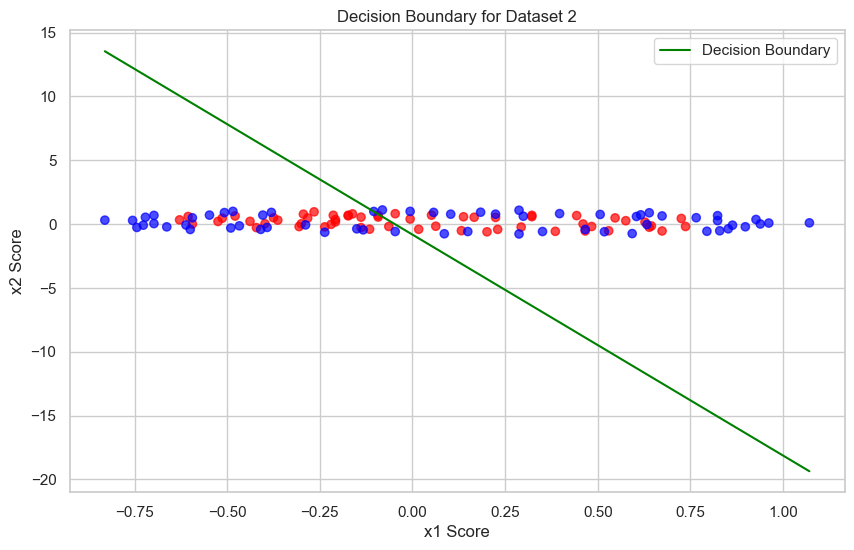

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df1['x1'], df1['x2'], c=df1['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x1 Score')
plt.ylabel('x2 Score')
plt.title('Decision Boundary for Dataset 1')
x_values = np.array([np.min(X1[:, 1]), np.max(X1[:, 1])])
y_values = -(theta1[0] + theta1[1] * x_values) / theta1[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(df2['x1'], df2['x2'], c=df2['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x1 Score')
plt.ylabel('x2 Score')
plt.title('Decision Boundary for Dataset 2')
x_values = np.array([np.min(X2[:, 1]), np.max(X2[:, 1])])
y_values = -(theta2[0] + theta2[1] * x_values) / theta2[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.legend()
plt.show()
